# MNIST Data
I'll make a t-SNE plot using the MNIST data as a dataframe. I'm loading the data using clustergrammer. 

In [43]:
from clustergrammer import Network
net = Network()

In [44]:
# get dataframe 
net.load_file('mnist.txt')
net.swap_nan_for_zero()
inst_df = net.dat_to_df()
df = inst_df['mat']

In [50]:
# export dataframe into numpy matrix for tsne
tuple_cols = df.columns.tolist()
rows = df.index.tolist()
mat = df.values

# color_dict 
num_dict = {'Zero':0, 'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8, 'Nine':9}

# get simple column names
columns = []
is_one = []
for inst_col in tuple_cols:
    num_name = inst_col[1].split(': ')[1]
    num_num = num_dict[num_name]
    columns.append(num_num)
    
    if num_num == 6:
        is_one.append(1)
    else:
        is_one.append(0)

# t-SNE plot

I'll use the example from the Visualizing with t-SNE notebook

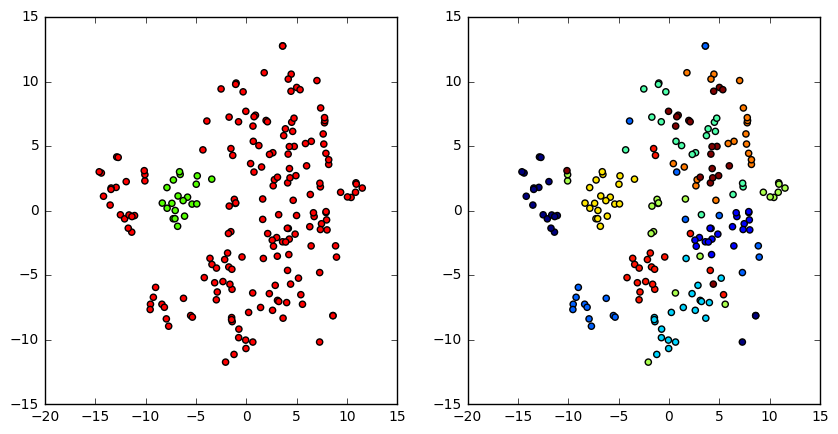

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from tsne import bh_sne

def make_tsne(mat, cmap_left, cmap_right):
    # the matrix needs to be transposed in order to cluster the numbers
    x_data = mat.transpose()

    # convert image data to float64 matrix. float64 is need for bh_sne
    x_data = np.asarray(x_data).astype('float64')

    # perform t-SNE embedding
    vis_data = bh_sne(x_data)

    # plot the result
    vis_x = vis_data[:, 0]
    vis_y = vis_data[:, 1]

    fig, axarr = plt.subplots(ncols=2, figsize=(10,5))
    axarr[0].scatter(vis_x, vis_y, c=cmap_left, cmap=plt.cm.get_cmap('prism',2))
    axarr[1].scatter(vis_x, vis_y, c=cmap_right)

    plt.show()

make_tsne(mat, is_one, columns)

The above plot is showing t-SNE visualizations 